In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
gold_data = pd.read_csv('gld_price_data.csv')

In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
correlation= gold_data.corr()

In [15]:
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


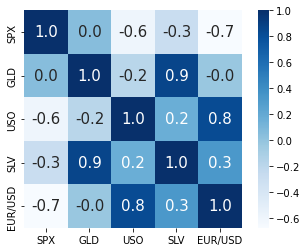

In [29]:
sns.heatmap(correlation, cbar=True,square=True, fmt='.1f', annot=True,annot_kws={'size': 15},cmap='Blues')
print(correlation['GLD'])

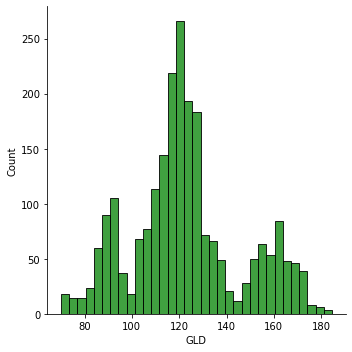

In [32]:
sns.displot(gold_data['GLD'],color='green')

In [33]:
X= gold_data.drop(['GLD','Date'],axis=1)

In [34]:
Y= gold_data['GLD']
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)
print(X.shape,X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [38]:
regressor= RandomForestRegressor(n_estimators=100)

In [40]:
regressor.fit(X_train,Y_train)
test_data_prediction =regressor.predict(X_test)
print(X_test,test_data_prediction)

              SPX        USO        SLV   EUR/USD
903   1351.949951  38.330002  32.900002  1.324854
129   1271.510010  93.900002  13.450000  1.472581
1787  1880.050049   8.910000  14.340000  1.119996
1913  2181.300049  10.960000  18.620001  1.127142
2048  2352.949951  10.680000  17.320000  1.067247
...           ...        ...        ...       ...
923   1370.869995  41.090000  33.220001  1.327492
1693  1952.290039  14.930000  13.990000  1.129089
2054  2349.010010  11.060000  17.430000  1.064453
658   1273.849976  37.680000  28.420000  1.315686
376   1057.579956  35.959999  17.250000  1.478131

[458 rows x 4 columns] [168.59319932  81.83279988 115.87139983 127.73540068 120.65080123
 154.68149824 150.2310992  126.20569997 117.37409881 125.82680134
 116.77400121 170.90540099 141.70499854 167.86769805 115.18880022
 117.65230031 138.64710252 169.86010047 159.51140312 159.59149938
 154.87400001 125.31409994 175.41849971 157.21920366 125.11330073
  93.84779992  77.39060029 120.34719991 118.98

In [42]:
error_score= metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.9899573868652392


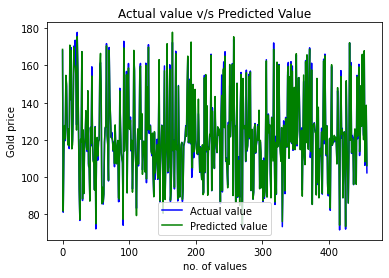

In [44]:
Y_test=list(Y_test)
plt.plot(Y_test,color='blue', label='Actual value')
plt.plot(test_data_prediction,color='green', label='Predicted value')
plt.title('Actual value v/s Predicted Value')
plt.xlabel('no. of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()